In [ ]:
heart_failure_clinical_records_dataset.csv

In [233]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy
from pandas_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score


In [198]:
#Load dataframe
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = pd.DataFrame(df)
print("Size of Flaredown data or df is",df.shape,df.dtypes)#Display the amount object and variables


Size of Flaredown data or df is (299, 13) age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


In [199]:
#Top  five rows on dataset
display(df.head())
dfb =df


age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [200]:
#Value_counts groups all the unique instances and gives the count of each of those instances.
display(df.dtypes.value_counts())
display(df.describe())

int64      10
float64     3
dtype: int64

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [201]:
  # number of unique counts in different parameters
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [202]:
#count of missing values of the entire dataframe'''
df.isnull().sum().sum


<bound method Series.sum of age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64>

In [205]:
df.columns


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [251]:
deathORalive = df.DEATH_EVENT.value_counts()
display(deathORalive)

dead = df[(df.DEATH_EVENT == 1)]
dead
Anemia = dead.anaemia.value_counts()
display(Anemia)

Smoking = dead.smoking.value_counts()
display(Smoking)

serum_creatinine  = dead.serum_creatinine.value_counts()
display(serum_creatinine)

0    203
1     96
Name: DEATH_EVENT, dtype: int64

0    50
1    46
Name: anaemia, dtype: int64

0    66
1    30
Name: smoking, dtype: int64

1.00    15
1.10     9
1.20     9
1.83     8
1.30     7
1.90     5
0.90     5
1.70     4
2.10     3
2.50     3
1.60     3
0.60     2
3.00     2
1.50     2
1.40     2
2.90     1
9.00     1
4.00     1
1.80     1
0.70     1
3.50     1
2.00     1
2.20     1
0.80     1
6.80     1
2.30     1
2.40     1
9.40     1
5.80     1
4.40     1
2.70     1
3.70     1
Name: serum_creatinine, dtype: int64

<ipython-input-245-41fe50731f7e>:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


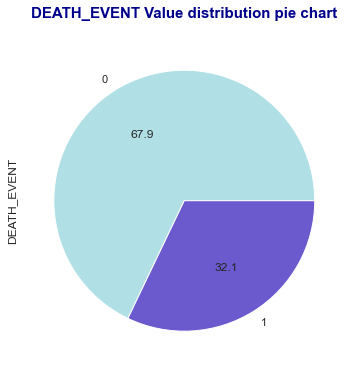

In [245]:
plt.figure(figsize = (10,6))
deathORalive.plot.pie(autopct = '%.1f', colors = ['powderblue', 'slateblue'])
plt.title("DEATH_EVENT Value distribution pie chart", pad = 20, fontdict = {'size' : 15, 'color' : 'darkblue', 'weight' : 'bold'})
plt.show()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
220  73.0        0                       582         0                 20   
230  60.0        0                       166         0                 30   
246  55.0        0                      2017         0                 25   
262  65.0        1                       258         1                 25   
266  55.0        0                      1199         0                 20   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00              1.90           130    1   
1                      0  263358.03              1.10           136    1   
2                      0  162000.00              1.30           129    1   
3                      0  210000.00              1.90           137    1   
4                      0  327000.00              2.70           116    0   
..                   ...        ...               ...           ...  ...   
220                    0  263358.03              1.83           134    1   
230                    0   62000.00              1.70           127    0   
246                    0  314000.00              1.10           138    1   
262                    0  198000.00              1.40           129    1   
266                    0  263358.03              1.83           134    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
220        0   198            1  
230        0   207            1  
246        0   214            1  
262        0   235            1  
266        1   241            1  

[96 rows x 13 columns]

<ipython-input-247-2a36184ad4ad>:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


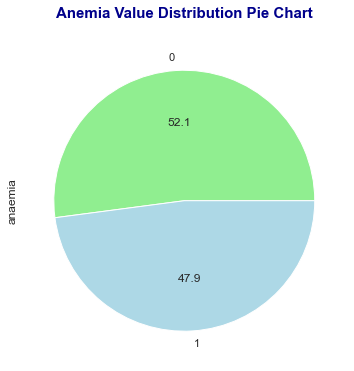

In [247]:
plt.figure(figsize = (10,6))
Anemia.plot.pie(autopct = '%.1f', colors = ['lightgreen', 'lightblue'])
plt.title("Anemia Value Distribution Pie Chart", pad = 20, fontdict = {'size' : 15, 'color' : 'darkblue', 'weight' : 'bold'})
plt.show()

<ipython-input-252-10b61383c0cc>:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


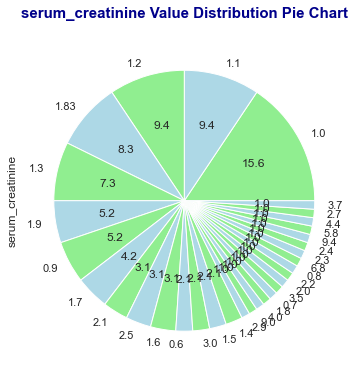

In [252]:
plt.figure(figsize = (10,6))
serum_creatinine.plot.pie(autopct = '%.1f', colors = ['lightgreen', 'lightblue'])
plt.title("serum_creatinine Value Distribution Pie Chart", pad = 20, fontdict = {'size' : 15, 'color' : 'darkblue', 'weight' : 'bold'})
plt.show()

<ipython-input-248-a89a7a1ed70e>:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


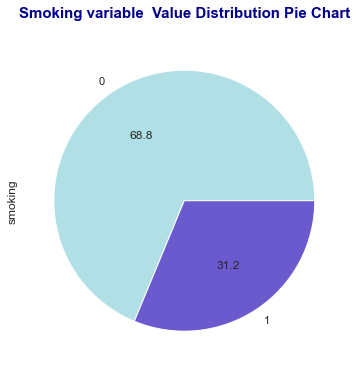

In [248]:
plt.figure(figsize = (10,6))
Smoking.plot.pie(autopct = '%.1f', colors = ['powderblue', 'slateblue'])
plt.title("Smoking variable  Value Distribution Pie Chart", pad = 20, fontdict = {'size' : 15, 'color' : 'darkblue', 'weight' : 'bold'})
plt.show()

<AxesSubplot:>

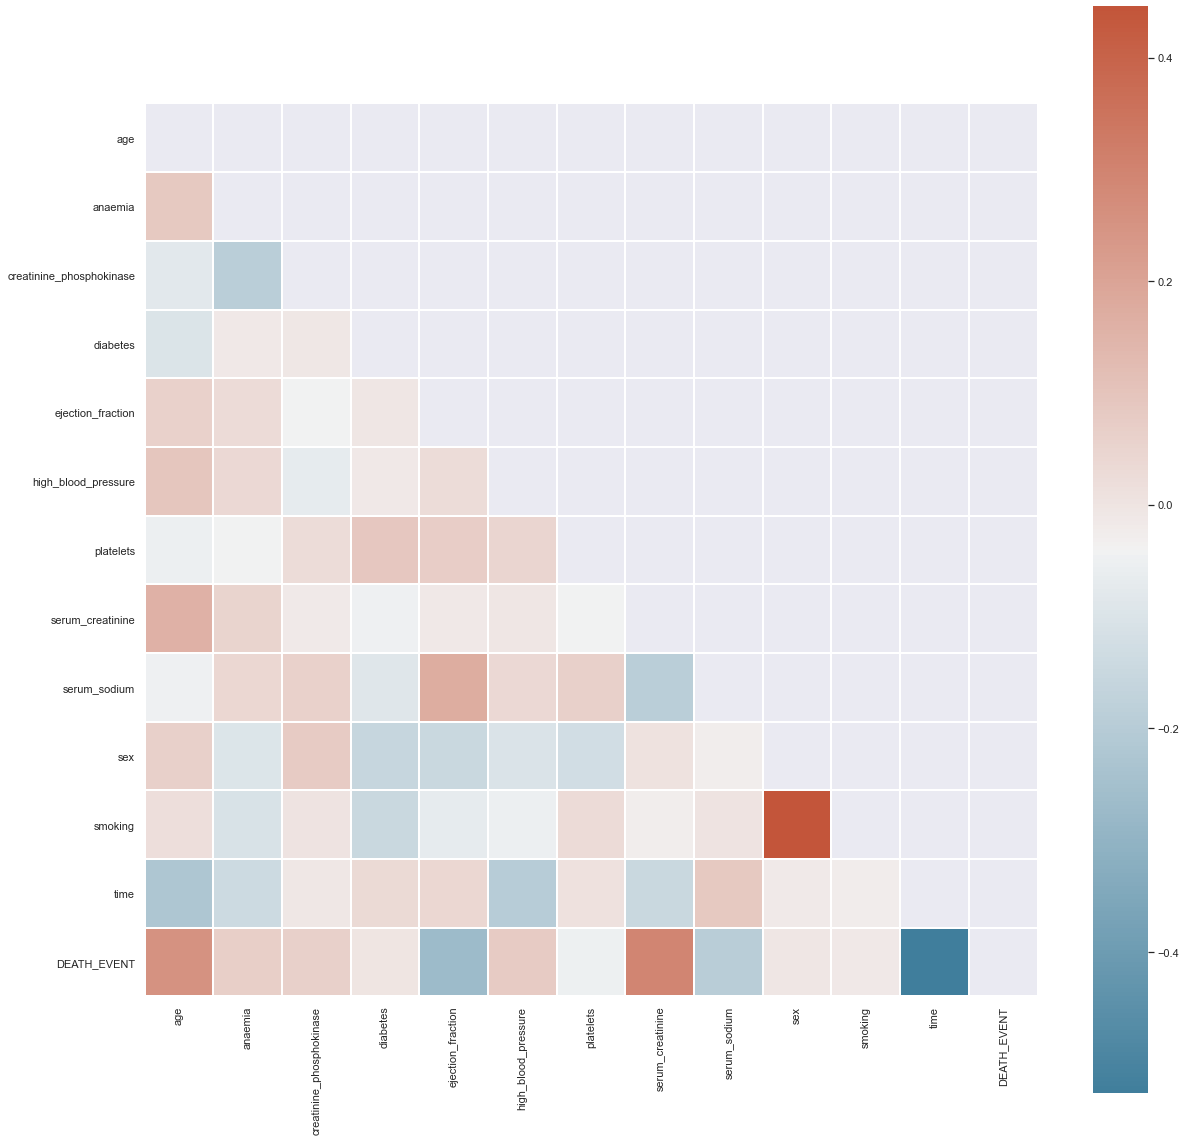

In [210]:
import numpy as np

# co-relation with each others
corrMat = df.corr()
fig, ax = plt.subplots(figsize = (20,20))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
mask = np.triu(np.ones_like(corrMat, dtype = bool))
sns.heatmap(corrMat, square = True, annot = False, linewidths = 1, cmap = cmap, mask = mask)

<AxesSubplot:>

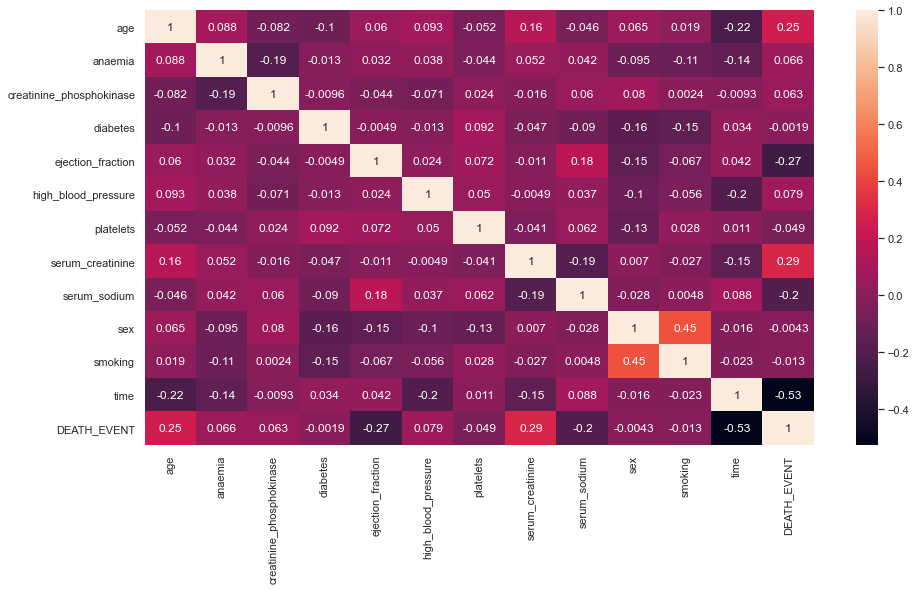

In [211]:
corr = df.corr()

# plot the heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           annot=True)

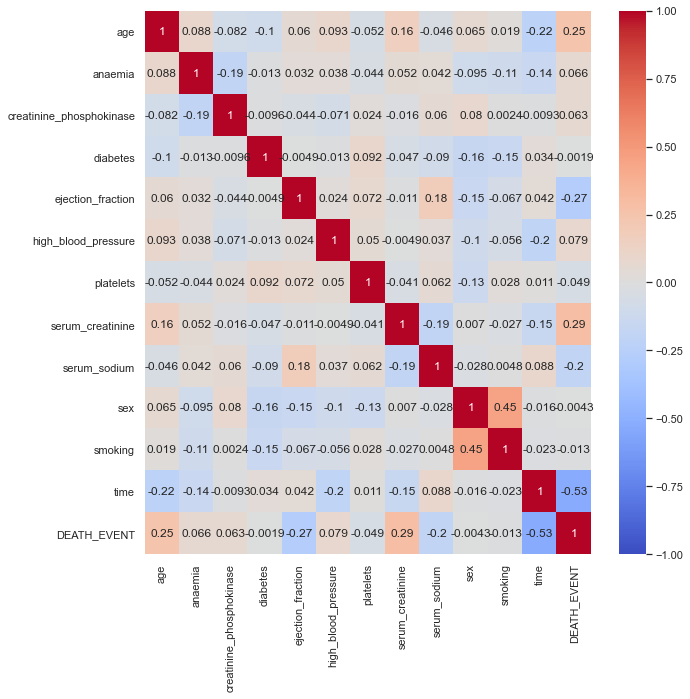

In [212]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);

In [213]:
corr_matrix = df.corr()
print(corr_matrix["DEATH_EVENT"].sort_values(ascending=False))

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64


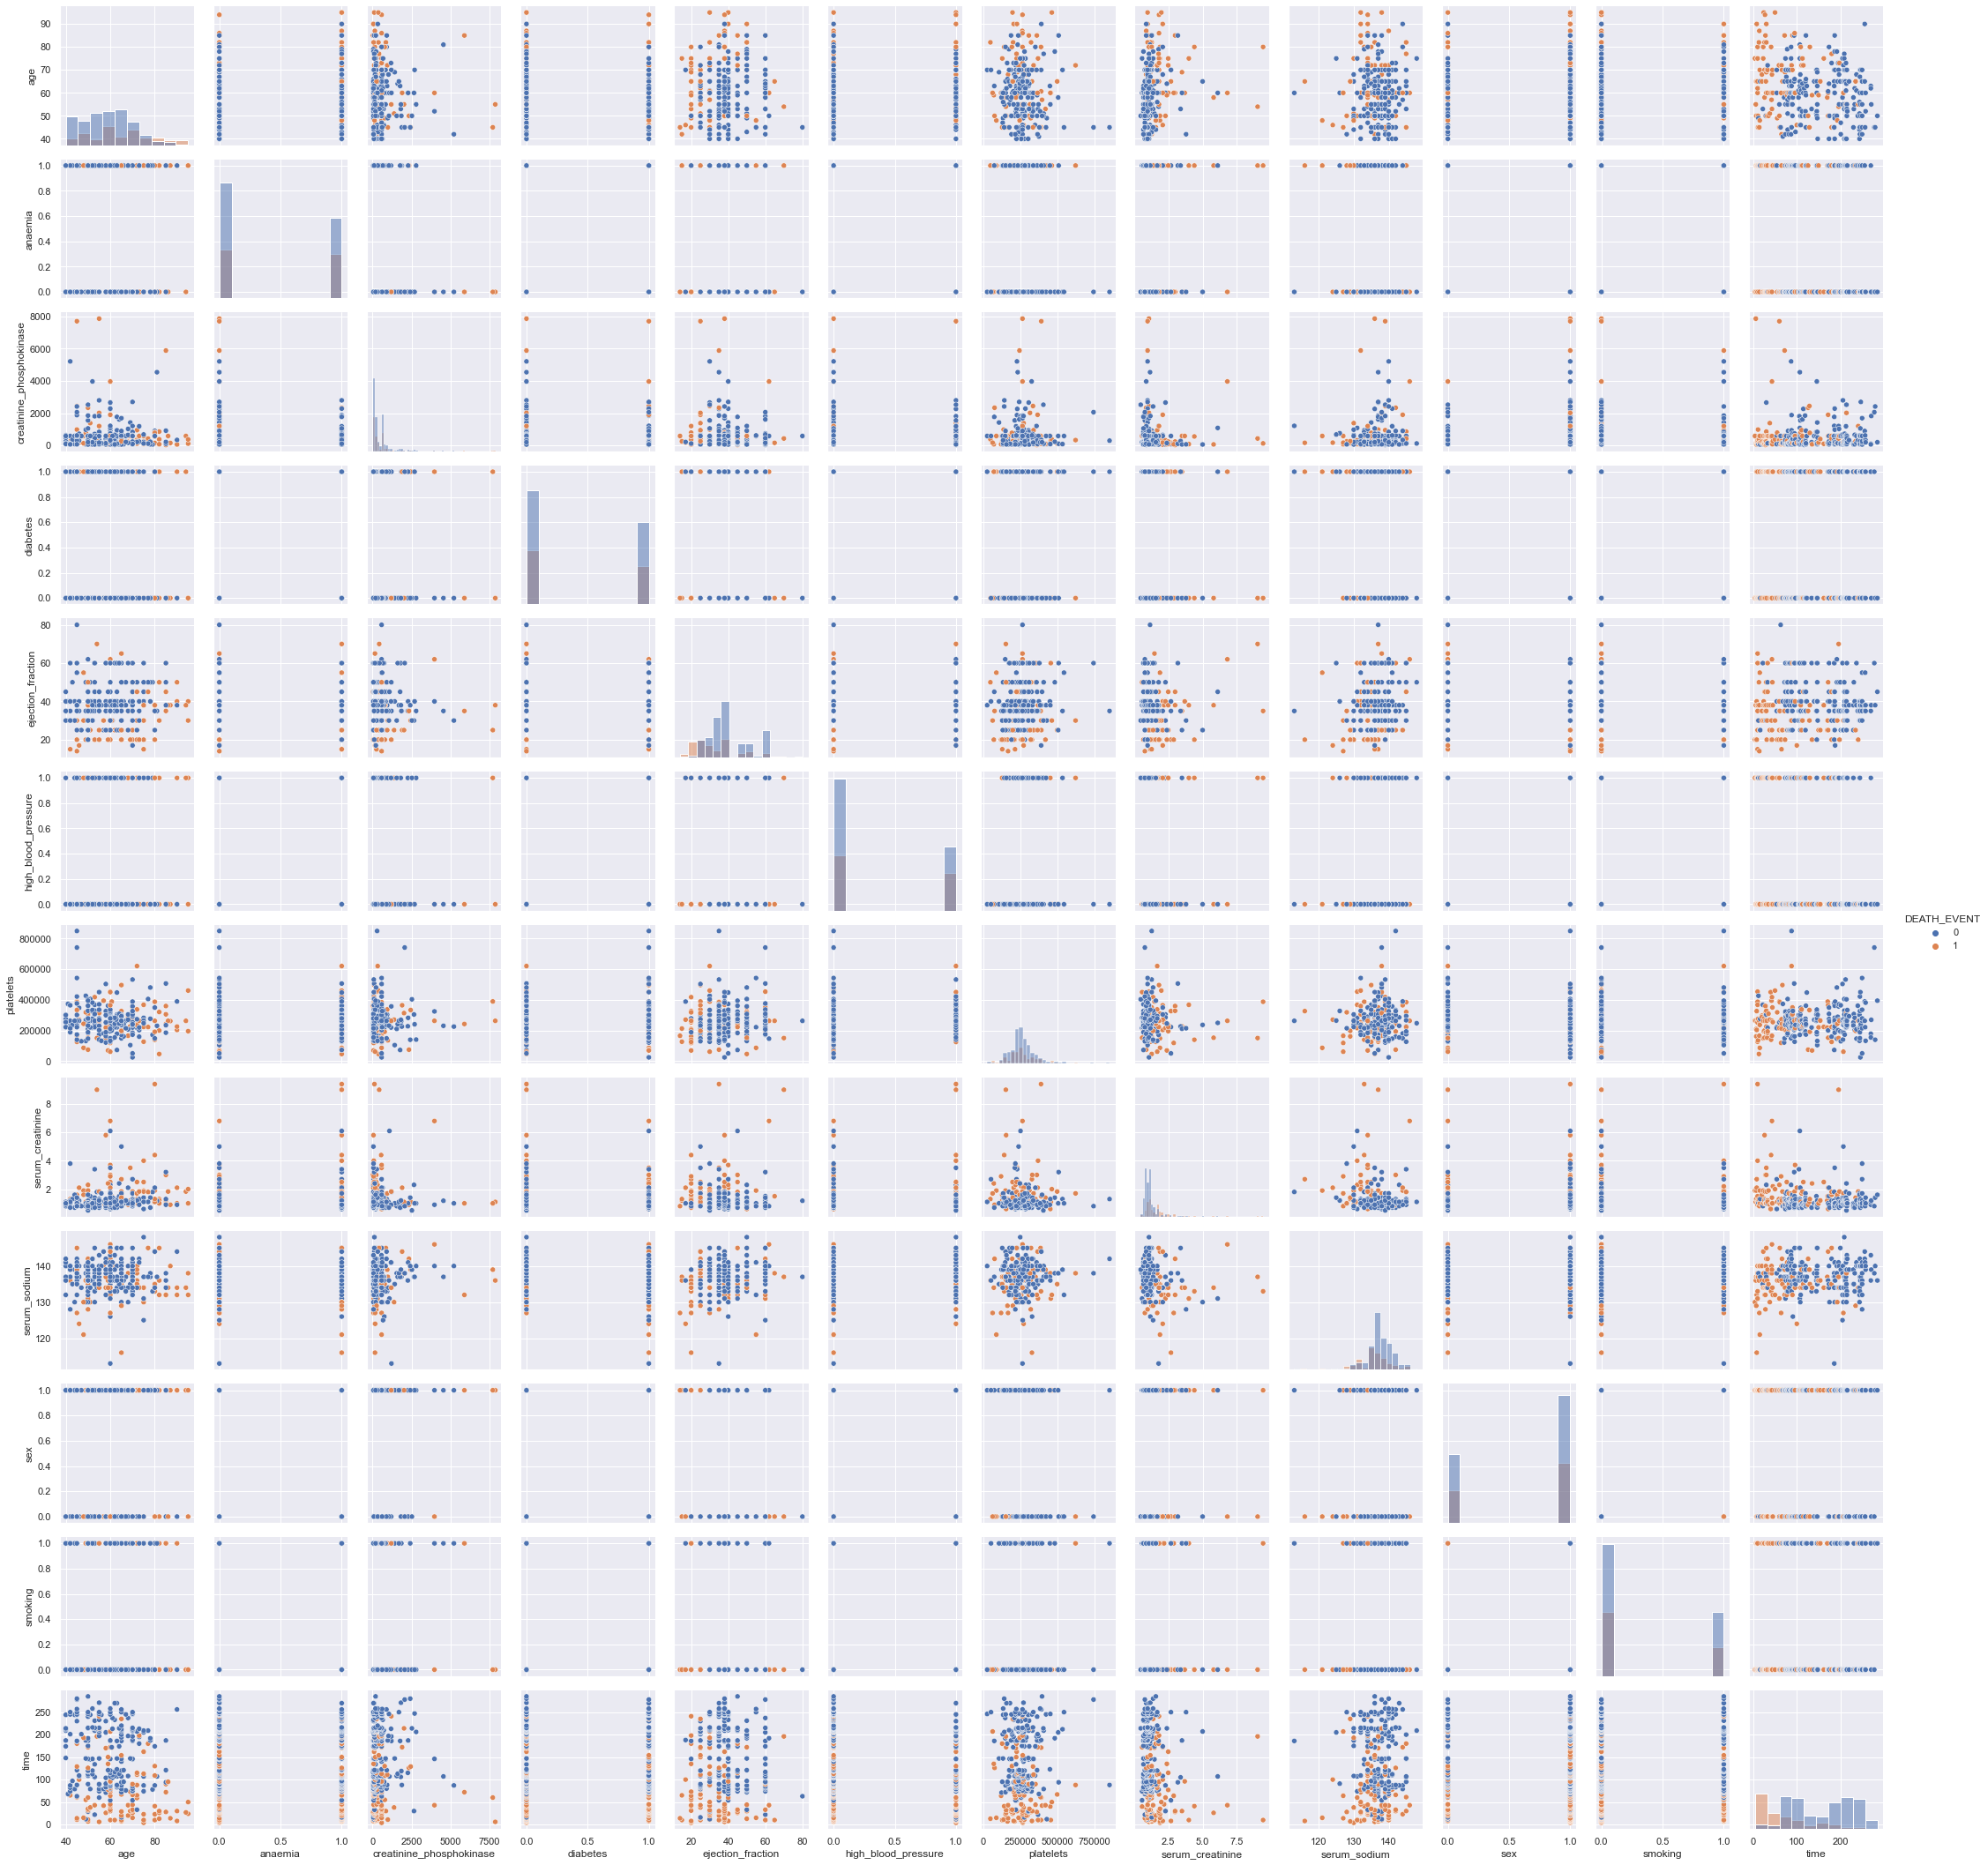

In [214]:
check1 = sns.PairGrid(df, hue="DEATH_EVENT")
check1.map_diag(sns.histplot)
check1.map_offdiag(sns.scatterplot)
check1.add_legend()

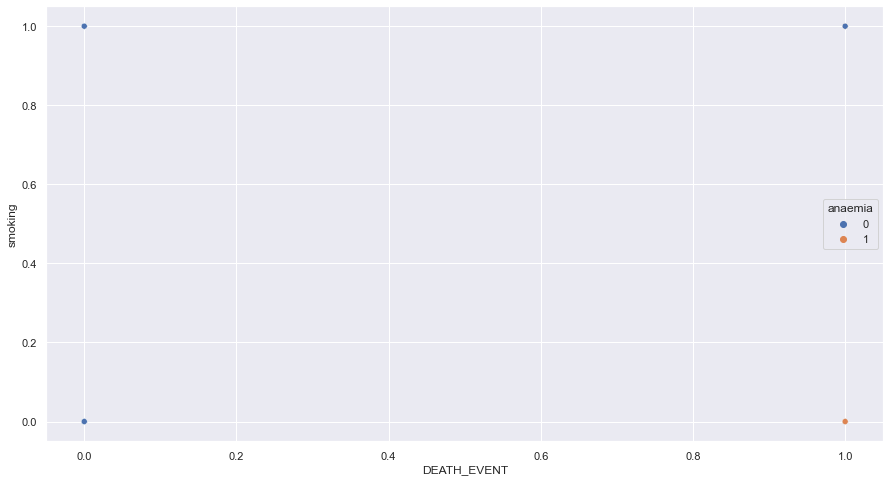

In [215]:
sns.scatterplot(x='DEATH_EVENT' , y='smoking', data=df, hue='anaemia')
plt.show()

In [229]:
profile = ProfileReport(df)


In [230]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Data Modeling

In [ ]:
features=['time','ejection_fraction','serum_creatinine']


In [ ]:
X=df[features]
y=df.DEATH_EVENT

Train Test Split


In [189]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [191]:
accuracy_list=[]

In [192]:
# logistic regression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)

accuracy_list.append(100*log_reg_acc)

In [193]:
print("Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  82.22%


In [194]:
# svc
from sklearn.svm import SVC

sv_clf = SVC()
sv_clf.fit(X_train, y_train)
sv_clf_pred = sv_clf.predict(X_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)


In [195]:
print("Accuracy of SVC is : ", "{:.2f}%".format(100* sv_clf_acc))

Accuracy of SVC is :  85.56%
